In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
from key import gkey
import json
import requests
import scipy.stats as st

In [2]:
# Reading 2008 unemployment data from csv file in outputs folder
unemployement_2008_df = pd.read_csv("outputs/State_unemployement_2008.csv")
unemployement_2008_df

,Unnamed: 0,State,Series Id,lat,lng,Rate Change
0,0,Alabama,LASST010000000000003,32.318231,-86.902298,3.7
1,1,Alaska,LASST020000000000003,64.200841,-149.493673,0.5
2,2,Arizona,LASST040000000000003,34.048928,-111.093731,3.5
3,3,Arkansas,LASST050000000000003,35.201050,-91.831833,1.8
4,4,California,LASST060000000000003,36.778261,-119.417932,3.2
5,5,Colorado,LASST080000000000003,39.550051,-105.782067,1.8
6,6,Connecticut,LASST090000000000003,41.603221,-73.087749,1.7
7,7,Delaware,LASST100000000000003,38.910832,-75.527670,3.0
8,8,DistrictofColumbia,LASST110000000000003,38.907192,-77.036871,2.0
9,9,Florida,LASST120000000000003,27.664827,-81.515754,3.5


In [3]:
# getting 'lat', 'lng' & 'Rate change' into lists
locations = unemployement_2008_df[["lat", "lng"]].astype(float)
unemployment_rate = unemployement_2008_df["Rate Change"].astype(float)

#  Configuring gmaps Api_key and creating a gmap figure and storing into heatmap_2008 variable.
gmaps.configure(api_key="")
heatmap_2008 = gmaps.figure()

# Creating unemployment Heatmap layer
heat_map = gmaps.heatmap_layer(locations, weights=unemployment_rate, max_intensity=3, point_radius = 15)
heatmap_2008.add_layer(heat_map)

heatmap_2008


Figure(layout=FigureLayout(height='420px'))

In [4]:
# Reading Selected Staes data from csv file in outputs folder
selected_states_df = pd.read_csv("outputs/Selected_states_2007_2016.csv")
selected_states_df[['State', 'year','Rate Change']]

,State,year,Rate Change
0,California,2016,-0.4
1,California,2015,-1.1
2,California,2014,-1.3
3,California,2013,-1.3
4,California,2012,-1.3
...,...,...,...
65,Ohio,2011,-1.3
66,Ohio,2010,-1.6
67,Ohio,2009,2.3
68,Ohio,2008,2.6


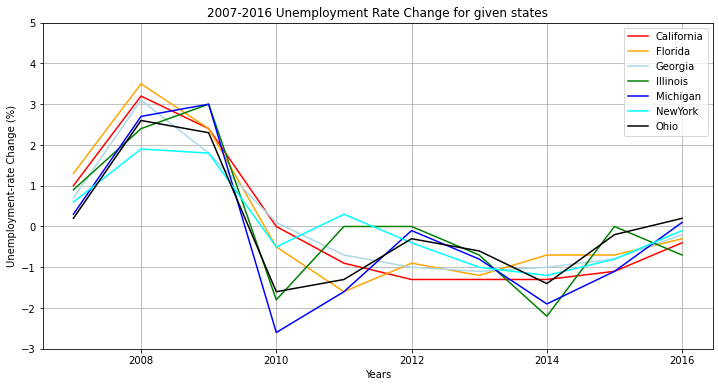

In [5]:
# Getting selected states[], colors[] & line_plots[] for given states.
locations_list = ["California", "Florida", "Georgia", "Illinois", "Michigan", "NewYork", "Ohio"]
colors = ["Red", "Orange", "lightblue", "Green", "Blue", "Cyan", "Black"]
line_plot=[]

plt.rcParams["figure.figsize"] = (12, 6)

for l,m in zip(locations_list, colors):
    s = l
    s = selected_states_df.loc[selected_states_df['State'] == l,['year', "Rate Change"]].reset_index(drop=True)
    s=s.iloc[::-1]
    x_axis = s['year']
    y_axis = s["Rate Change"]
#     Creating a plot for everyloop and appending to the line_plot[]
    line, = plt.plot(x_axis, y_axis, color=m, label=l)
    line_plot.append(line)


plt.ylim([-3,5])
plt.xlabel("Years")
plt.ylabel("Unemployment-rate Change (%)")
plt.title("2007-2016 Unemployment Rate Change for given states")
plt.grid()

# Getting handles from line_plot[] 'label' parameter
plt.legend(handles=line_plot )


plt.savefig('outputs/States-Linechart.png')

